In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from math import floor
from sklearn.preprocessing import LabelEncoder

csv_files = [
    #'Monday-WorkingHours.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    #'Wednesday-workingHours.pcap_ISCX.csv',
    # 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    #'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    #'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    # 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
]

days = [
    #'Monday',
    'Tuesday',
    #'Wednesday',
    #'Thursday',
    'Friday'
]
vars = ['Flow Duration', 'Flow Packets/s', 'Flow Bytes/s']
xlabel = 'Type of Attack'

fig_w = 24
fig_h = 12

def create_plot(df: pd.DataFrame, day: str):
    # Dataframe validation
    if (df is None or df.empty):
        return

    # Preprocessing: Filter invalid data rows
    df = df.drop(df[pd.isnull(df['Flow ID'])].index)
    # Encoder for data transforming
    encoder = LabelEncoder()
    for var in vars:
        # Preprocessing: Replace invalid value by -1 & convert values as numerics
        df[var].replace('Infinity', -1, inplace=True)
        df[var].replace([np.inf, -np.inf, np.nan], -1, inplace=True)
        df[var] = df[var].apply(pd.to_numeric)
        # Remove negative values
        df = df.loc[df[var] > 0]

    # 1st figure: Abnormal Statistic
    fig, axs = plt.subplots(1, 2)
    #fig.suptitle(day)
    fig.set_size_inches(fig_w, 6)
    fig.set(facecolor='white')

    df['Status'] = df['Label'].map(lambda v: 'Normal' if v == 'BENIGN' else 'Abnormal')
    df['Rate'] = df['Flow Bytes/s'] / df['Flow Duration']

    s_labels = ['Normal', 'Abnormal']
    # Using log
    data_filter = lambda label: np.log(df.loc[df['Status'] == label]['Rate'].values)
    # Using Label Encoding
    #data_filter = lambda label: encoder.fit_transform(df.loc[df['Status'] == label]['Rate'].values)
    dataset = list(map(data_filter, s_labels))
    if len(dataset[1]) == 0: 
        dataset[1] = np.array([0] * len(dataset[0]))
    s_graph_labels = s_labels.copy()
    s_graph_labels.insert(0, '')

    # Draw Boxplot on the left
    axs[0].boxplot(dataset)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel('[Flow Packets/s / Flow Duration]')
    axs[0].set_xticks(range(len(s_graph_labels)), labels=s_graph_labels)

    # Draw Violinplot on the right
    axs[1].violinplot(dataset)
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel('[Flow.Packets/s / Flow Duration]')
    axs[1].set_xticks(range(len(s_graph_labels)), labels=s_graph_labels)
    
    # Save figure to images
    # fig.savefig(f'../Figure/{day} - Abnormal with Log.png')

    # 2nd figure: plots with Type of Attacks in detail
    # Pyplot figure: Configure 2 columns, width, height & background color
    # Number of rows in figure is equal to number of vars
    fig, axs = plt.subplots(len(vars), 2)
    #fig.suptitle(day)
    fig.set_size_inches(fig_w, fig_h)
    fig.set(facecolor='white')

    # Labels for filtering
    labels: list = df['Label'].unique().tolist()
    # Labels for figures
    plot_labels = labels.copy()
    plot_labels.insert(0, '')

    # Draw plots by rows
    row = 0
    for var in vars:
        try:           
            # Preprocessing: Filter values by Label & Transform
            # Using log
            data_filter = lambda label: np.log(df.loc[df['Label'] == label][var].values)
            # Using Label Encoding
            #data_filter = lambda label: encoder.fit_transform(df.loc[df['Label'] == label][var].values)
            dataset = list(map(data_filter, labels))
            
            # Show statistical values
            print(f'[{var}] Min: {df[var].min()}', end="; ")
            print(f'Max: {df[var].max()}', end="; ")
            print(f'Mean: {df[var].mean()}', end="; ")
            print(f'Median: {df[var].median()}', end="; ")
            print(f'Standard Deviation: {df[var].std()}')

            # Draw Boxplot at 1st column (row, 0)
            axs[row, 0].boxplot(dataset)
            axs[row, 0].set_xlabel(xlabel)
            #axs[row, 0].set_ylabel(var)
            axs[row, 0].set_ylabel(f'Log ({var})')
            axs[row, 0].set_xticks(range(len(plot_labels)), labels=plot_labels)

            # Draw Violinplot at 2nd column (row, 1)
            axs[row, 1].violinplot(dataset)
            axs[row, 1].set_xlabel(xlabel)
            #axs[row, 1].set_ylabel(var)
            axs[row, 1].set_ylabel(f'Log ({var})')
            axs[row, 1].set_xticks(range(len(plot_labels)), labels=plot_labels)
        except ValueError as e:
            print(e)

        row += 1
    
    # Save figures to images
    # fig.savefig(f'../Figure/{day} - Log.png')


Tuesday: 445909 rows
[Flow Duration] Min: 1; Max: 119999977; Mean: 13975905.602734588; Median: 59515.0; Standard Deviation: 33197377.517177377
[Flow Packets/s] Min: 0.025000665; Max: 3000000.0; Mean: 35794.57838793871; Median: 66.12226006; Standard Deviation: 180796.28818427067
[Flow Bytes/s] Min: 0.066617037; Max: 2070000000.0; Mean: 1833680.7573152296; Median: 5896.805897; Standard Deviation: 26739755.46284397
Friday: 191033 rows
[Flow Duration] Min: 1; Max: 119999993; Mean: 12510635.29151984; Median: 35957.0; Standard Deviation: 31734074.984687146
[Flow Packets/s] Min: 0.016748648; Max: 3000000.0; Mean: 48754.49371894147; Median: 85.08918410999999; Standard Deviation: 208158.7724233323
[Flow Bytes/s] Min: 0.093648576; Max: 2070000000.0; Mean: 1934714.1083493766; Median: 7222.046309; Standard Deviation: 25744151.47700641


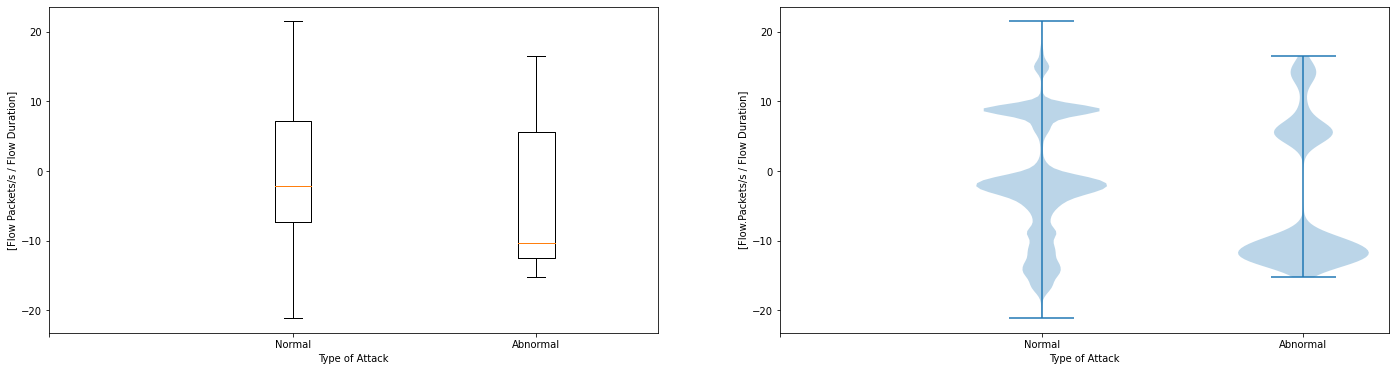

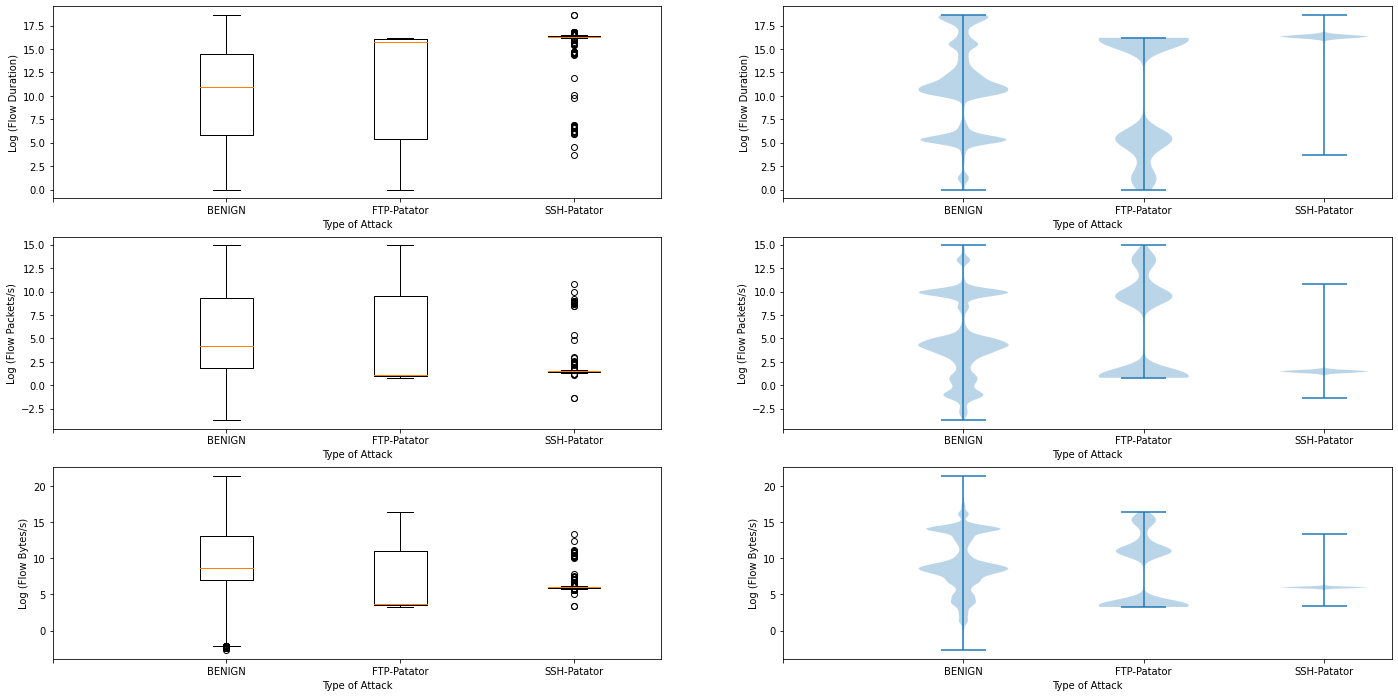

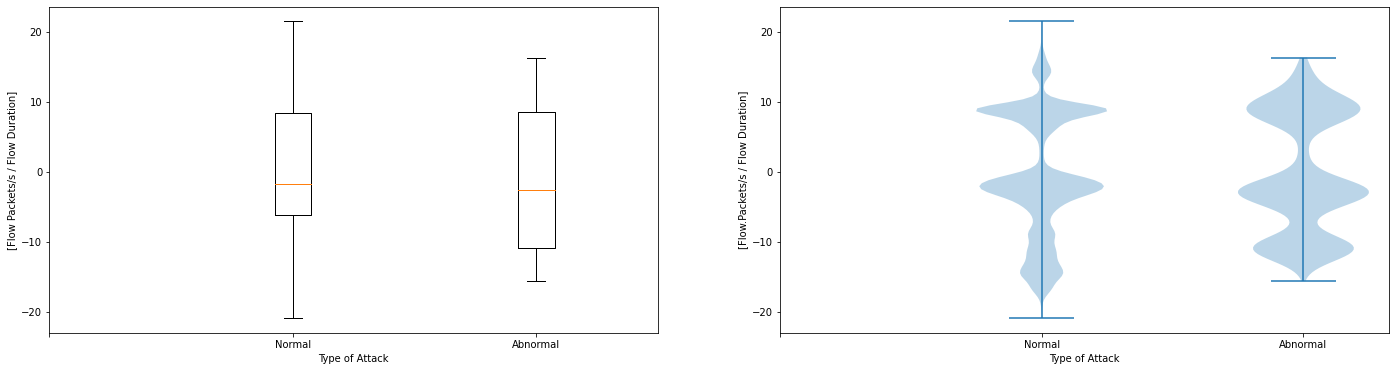

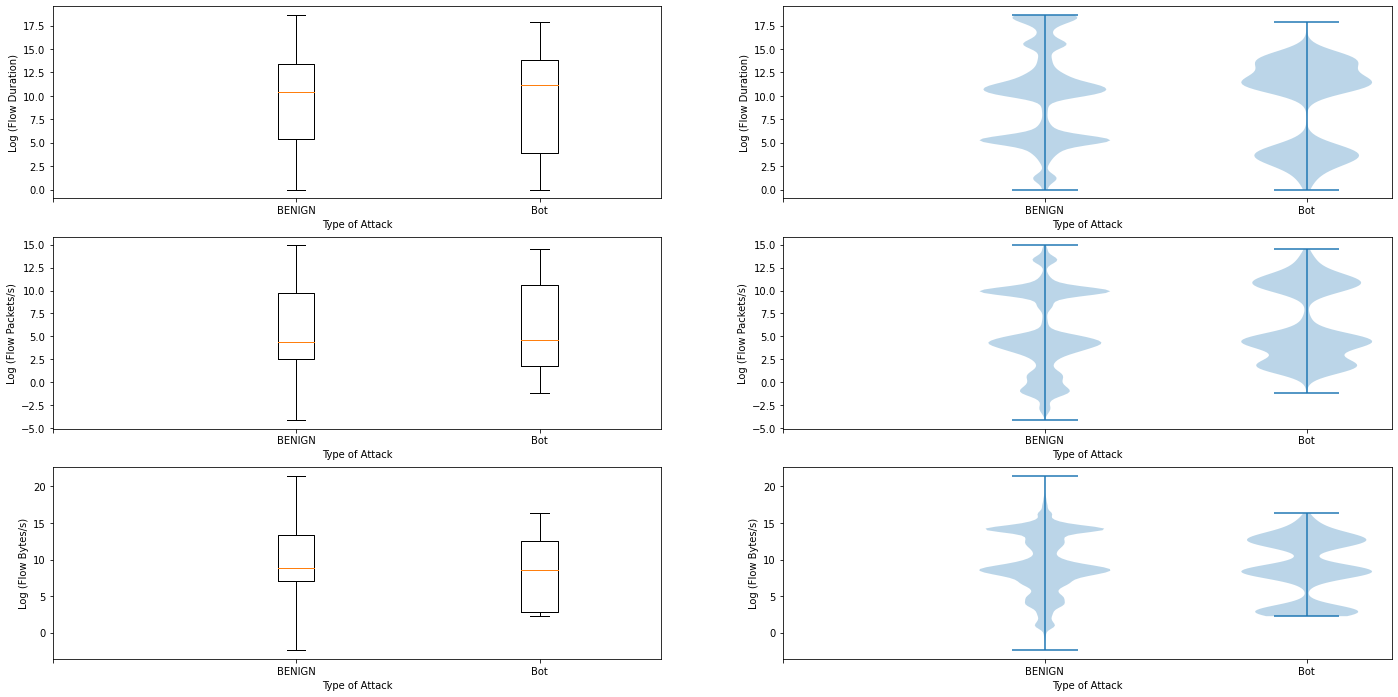

In [4]:
for day in days:
    # Filter & merge dataset by day
    paths = list(filter(lambda s: s.startswith(day), csv_files))
    df = None
    for path in paths:
        absolute_path = f'/Users/emmap/Downloads/TrafficLabelling/{path}'
        if df is None:
            df = pd.read_csv(absolute_path)
        else:
            df.merge(pd.read_csv(absolute_path))
    
    print(f'{day}: {len(df.index)} rows')
    df = df.rename(columns=lambda s: s.strip())
    # Create plots
    create_plot(df=df, day=day)
    